<a href="https://colab.research.google.com/github/dev-strix/ProyectoMineriaDATOS/blob/main/Trabajo_sesion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRISP-DM**

## **Fase 1. Comprensión del negocio**

**Definición del problema**

Clasificar o detectar el riesgo de preeclampsia en una mujer embarazada a partir de datos clínicos, sin la necesidad de esperar la aparición de los síntomas severos y sus complicaciones.


*   Problema: detección temprana de riesgo de preeclampsia.
*   Objetivo general: construir una línea base analítica y un modelo de clasificación.
*   Métricas de éxito: Accuracy ≥ 0.80, AUC ≥ 0.85 (binario) / AUC-macro ≥ 0.80 (multiclase), Recall alto para clase positiva.

## **Fase 2: Comprensión de los datos**

**Dataset:** Preeclampsia.csv

Este cuaderno reproduce paso a paso la recolección, descripción, EDA y diagnóstico de calidad.

### 2.0) Importaciones y lectura del archivo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 1. Recolección de datos
# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('/content/Preeclampsia.csv')
df.head()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
0,29,13,140,76,22.22,73,124,10.22,39.84,3.02,...,130.47,192.72,1,0,1,1,0,0,2,0
1,24,12,148,96,18.64,72,139,11.79,40.22,3.23,...,132.72,251.72,0,1,0,1,1,0,2,2
2,34,12,162,90,33.66,74,133,15.75,40.39,1.61,...,62.39,222.60,0,1,1,0,1,1,0,0
3,26,11,161,61,33.54,82,121,11.84,43.61,2.37,...,80.26,229.98,1,1,1,1,0,0,2,0
4,34,13,165,92,19.97,86,124,15.96,40.96,4.33,...,28.26,240.11,1,1,0,0,0,1,1,0


### 2.1) Recolección inicial de datos

In [ ]:
print('\n*** Info general ***')
print(df.info())
print('\n*** Primeras filas ***')
display(df.head())


*** Info general ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1800 non-null   int64  
 1   gest_age    1800 non-null   int64  
 2   height      1800 non-null   int64  
 3   weight      1800 non-null   int64  
 4   bmi         1800 non-null   float64
 5   sysbp       1800 non-null   int64  
 6   diabp       1800 non-null   int64  
 7   hb          1800 non-null   float64
 8   pcv         1800 non-null   float64
 9   tsh         1800 non-null   float64
 10  platelet    1800 non-null   int64  
 11  creatinine  1800 non-null   float64
 12  plgf:sflt   1800 non-null   float64
 13  SEng        1800 non-null   float64
 14  cysC        1800 non-null   float64
 15  pp_13       1800 non-null   float64
 16  glycerides  1800 non-null   float64
 17  htn         1800 non-null   int64  
 18  diabetes    1800 non-null   int64  
 19  fam_h

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
0,29,13,140,76,22.22,73,124,10.22,39.84,3.02,...,130.47,192.72,1,0,1,1,0,0,2,0
1,24,12,148,96,18.64,72,139,11.79,40.22,3.23,...,132.72,251.72,0,1,0,1,1,0,2,2
2,34,12,162,90,33.66,74,133,15.75,40.39,1.61,...,62.39,222.60,0,1,1,0,1,1,0,0
3,26,11,161,61,33.54,82,121,11.84,43.61,2.37,...,80.26,229.98,1,1,1,1,0,0,2,0
4,34,13,165,92,19.97,86,124,15.96,40.96,4.33,...,28.26,240.11,1,1,0,0,0,1,1,0


### 2.2) Descripción de datos (estructura, tipos de variables)

In [ ]:
# Estructura del dataset
print("\n*** Estructura del dataset ***")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")
print(f"Total de registros: {len(df)}")

# Tipos de variables (numéricas, categóricas, fechas, texto)
print("\n*** Tipos de variables ***")
print(df.dtypes.value_counts())   # conteo por tipo

# Verificar si existen variables de fecha
fecha_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("\nColumnas de tipo fecha:", fecha_cols if len(fecha_cols) > 0 else "No se encontraron columnas de fecha")

# Verificar si existen variables de texto (object)
texto_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas de tipo texto:", texto_cols if len(texto_cols) > 0 else "No se encontraron columnas de texto")

stats_num = df.select_dtypes(include=['int64','float64']).describe()
display(stats_num)


*** Estructura del dataset ***
Filas: 1800
Columnas: 25
Total de registros: 1800

*** Tipos de variables ***
int64      15
float64    10
Name: count, dtype: int64

Columnas de tipo fecha: No se encontraron columnas de fecha
Columnas de tipo texto: No se encontraron columnas de texto


,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,25.967778,11.958889,157.030556,77.481667,26.562800,79.220556,129.458333,12.987383,40.993744,2.998972,...,80.091889,222.473989,0.500556,0.496111,0.496667,0.511111,1.011111,0.522222,0.995000,1.031667
std,4.999952,0.804019,10.126584,18.722297,4.932147,5.718787,5.797916,1.722532,2.869498,1.160001,...,31.069300,26.630915,0.500139,0.500124,0.500128,0.500015,0.813237,0.499645,0.817728,0.819168
min,18.000000,11.000000,140.000000,45.000000,18.050000,70.000000,120.000000,10.020000,36.040000,1.000000,...,25.270000,175.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,11.000000,148.000000,62.000000,22.330000,74.000000,124.000000,11.500000,38.495000,1.987500,...,53.152500,199.897500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,12.000000,157.000000,77.000000,26.480000,79.000000,130.000000,12.930000,40.990000,2.970000,...,80.865000,222.340000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,30.000000,13.000000,166.000000,94.000000,30.780000,84.000000,134.000000,14.500000,43.542500,4.000000,...,107.002500,245.165000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,34.000000,13.000000,174.000000,109.000000,34.980000,89.000000,139.000000,15.970000,45.990000,4.990000,...,133.040000,269.670000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


### 2.3) Análisis exploratorio descriptivo (gráficos)


*** Estadísticas iniciales (media, mediana) ***
                  mean      50%         std     min     max
age          25.967778   26.000    4.999952   18.00   34.00
gest_age     11.958889   12.000    0.804019   11.00   13.00
height      157.030556  157.000   10.126584  140.00  174.00
weight       77.481667   77.000   18.722297   45.00  109.00
bmi          26.562800   26.480    4.932147   18.05   34.98
sysbp        79.220556   79.000    5.718787   70.00   89.00
diabp       129.458333  130.000    5.797916  120.00  139.00
hb           12.987383   12.930    1.722532   10.02   15.97
pcv          40.993744   40.990    2.869498   36.04   45.99
tsh           2.998972    2.970    1.160001    1.00    4.99
platelet    250.852222  248.500   62.179476  150.00  359.00
creatinine    1.048122    1.050    0.255505    0.60    1.49
plgf:sflt   202.419450  201.030  115.000259    4.10  399.32
SEng         18.083167   17.905    5.633666    8.08   27.86
cysC          1.086922    1.070    0.289215    0.61

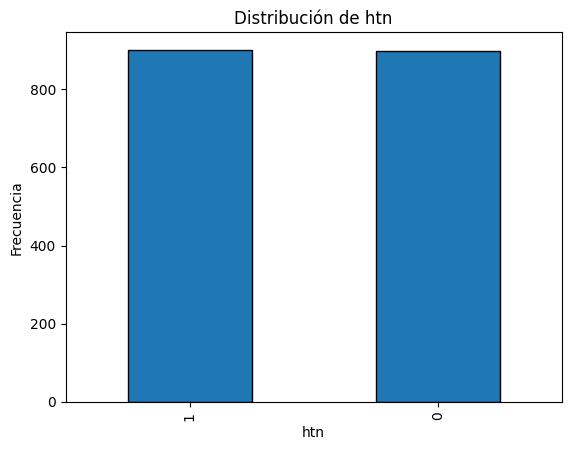


Frecuencias de diabetes:
diabetes
0    907
1    893
Name: count, dtype: int64


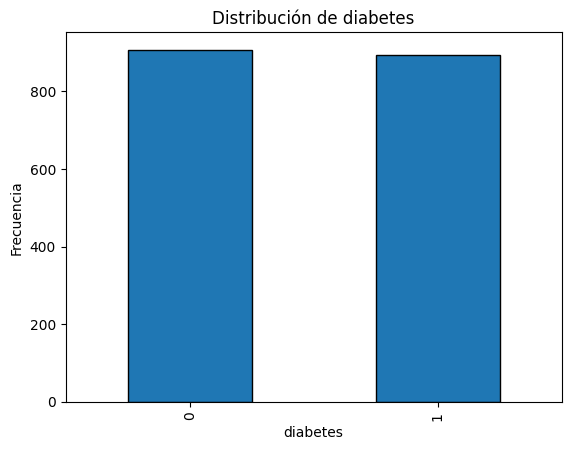


Frecuencias de fam_htn:
fam_htn
0    906
1    894
Name: count, dtype: int64


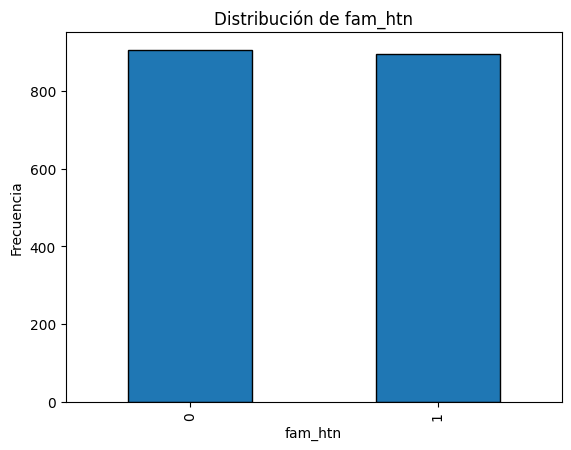


Frecuencias de diet:
diet
1    940
0    860
Name: count, dtype: int64


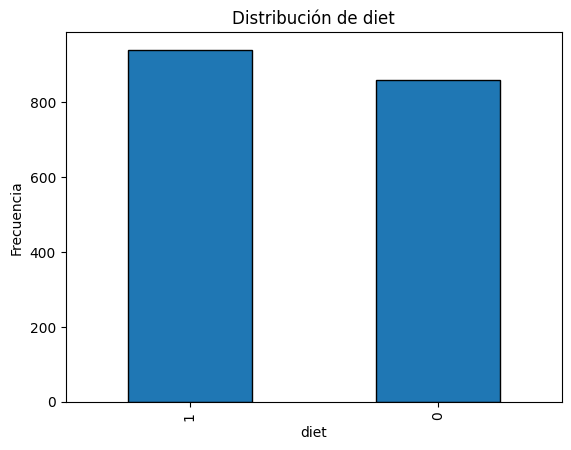


Frecuencias de activity:
activity
0    606
2    597
1    597
Name: count, dtype: int64


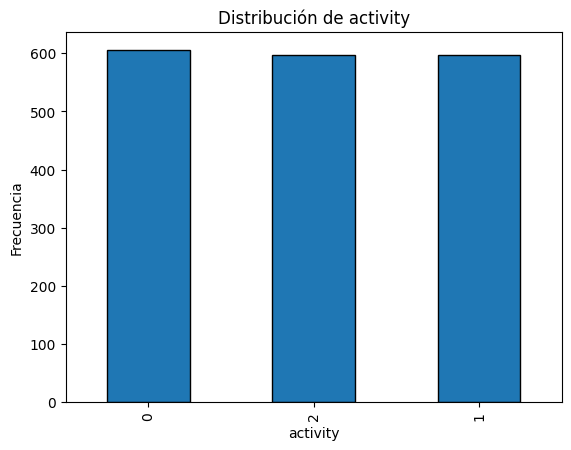


Frecuencias de sleep:
sleep
2    633
1    591
0    576
Name: count, dtype: int64


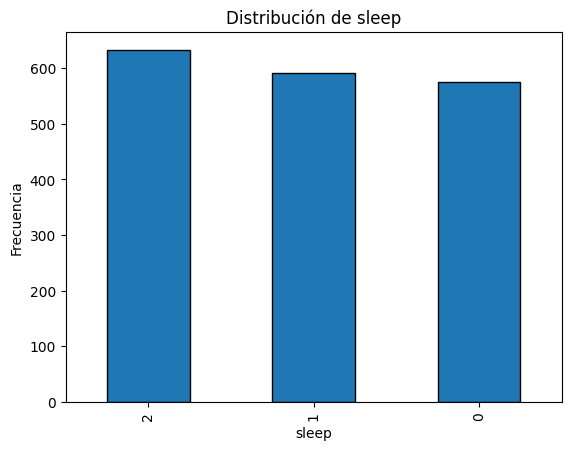


Frecuencias de sp_art:
sp_art
1    920
0    880
Name: count, dtype: int64


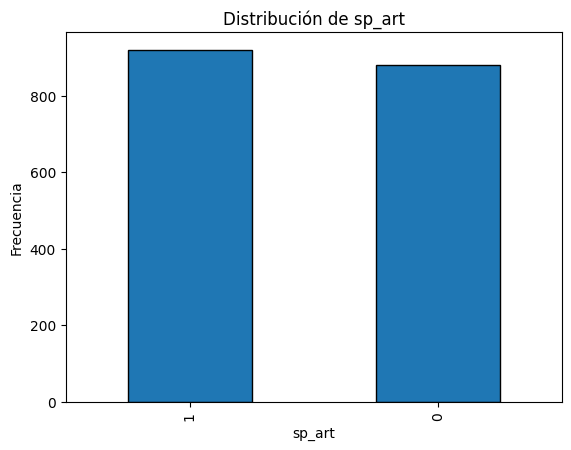

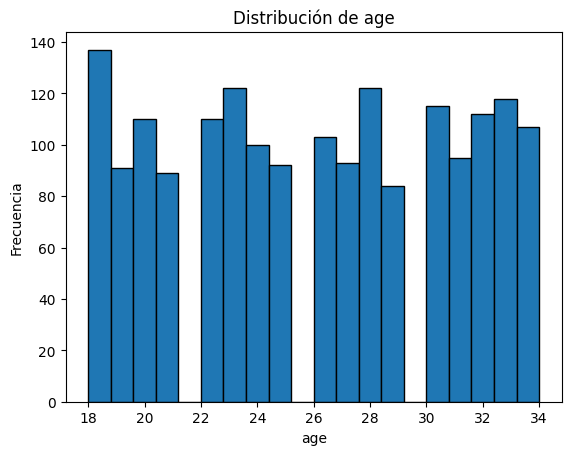

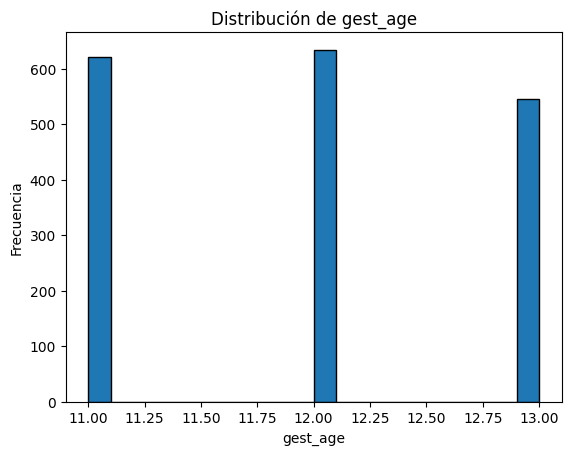

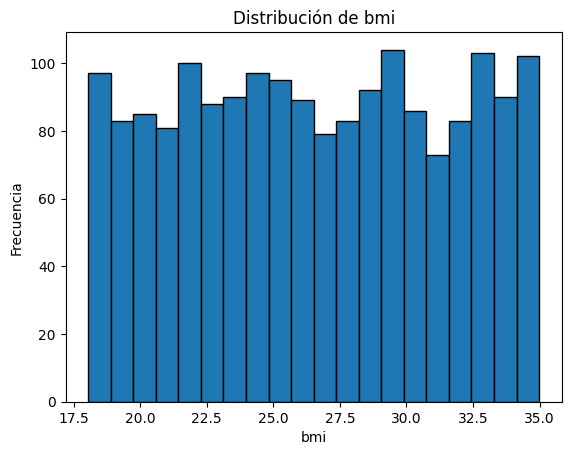

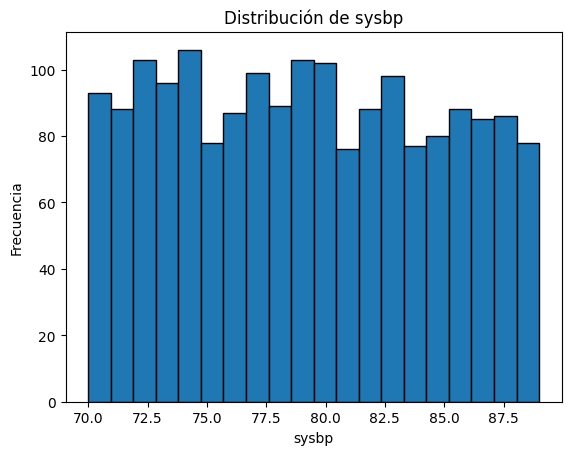

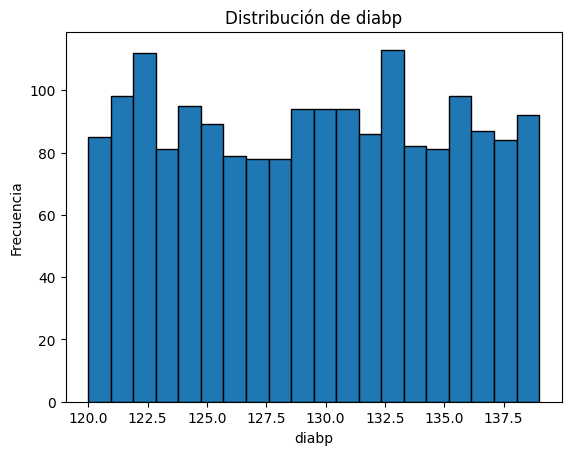

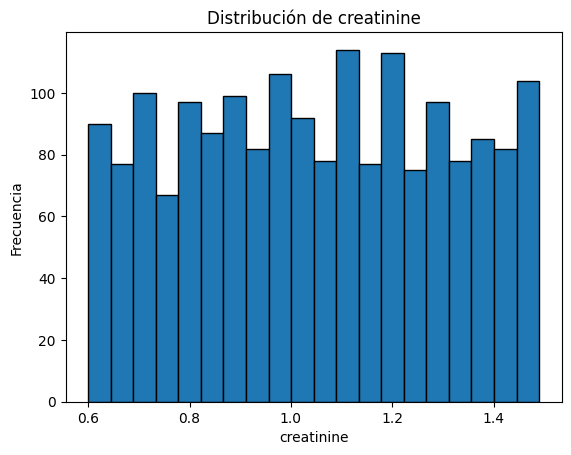

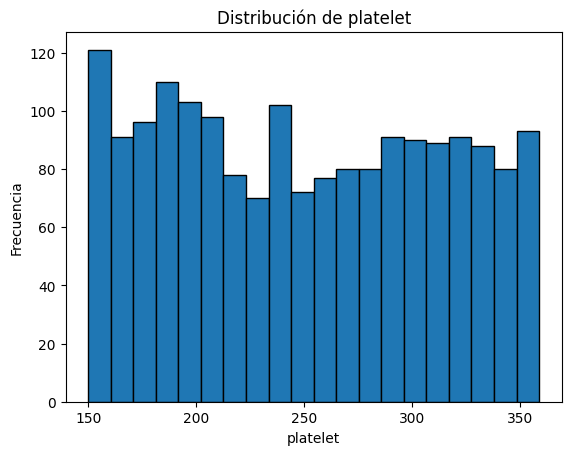


Tabla de frecuencias - ocupación
occupation
1    610
2    605
0    585
Name: count, dtype: int64


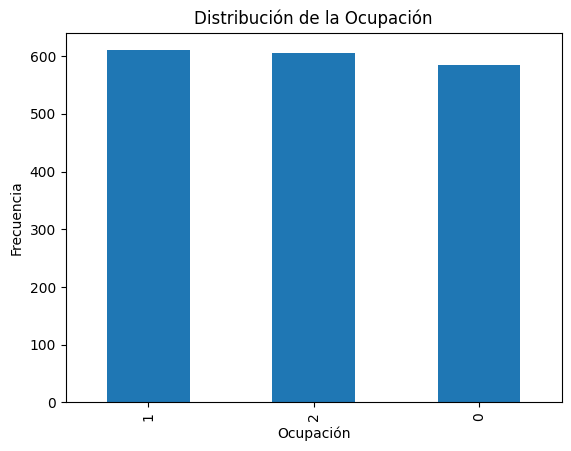

In [ ]:
# --- Estadísticas iniciales ---
print("\n*** Estadísticas iniciales (media, mediana) ***")
print(df.describe().T[['mean','50%','std','min','max']])

# --- Frecuencias para variables binarias (ej. HTA, diabetes, antecedentes familiares) ---
binary_vars = ['htn','diabetes','fam_htn','diet','activity','sleep','sp_art']
for col in binary_vars:
    if col in df.columns:
        print(f"\nFrecuencias de {col}:")
        print(df[col].value_counts())

        # gráfico de barras
        plt.figure()
        df[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

# --- Histogramas de variables numéricas clave ---
num_vars = ['age','gest_age','bmi','sysbp','diabp','creatinine','platelet']
for col in num_vars:
    if col in df.columns:
        plt.figure()
        df[col].plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

# --- Tablas de frecuencia para ocupación (si está en dataset) ---
if 'occupation' in df.columns:
    print("\nTabla de frecuencias - ocupación")
    print(df['occupation'].value_counts())

    plt.figure()
    df['occupation'].value_counts().plot(kind='bar')
    plt.title("Distribución de la Ocupación")
    plt.xlabel("Ocupación")
    plt.ylabel("Frecuencia")
    plt.show()

#### 2.3-bis) Correlaciones y cruces de variables

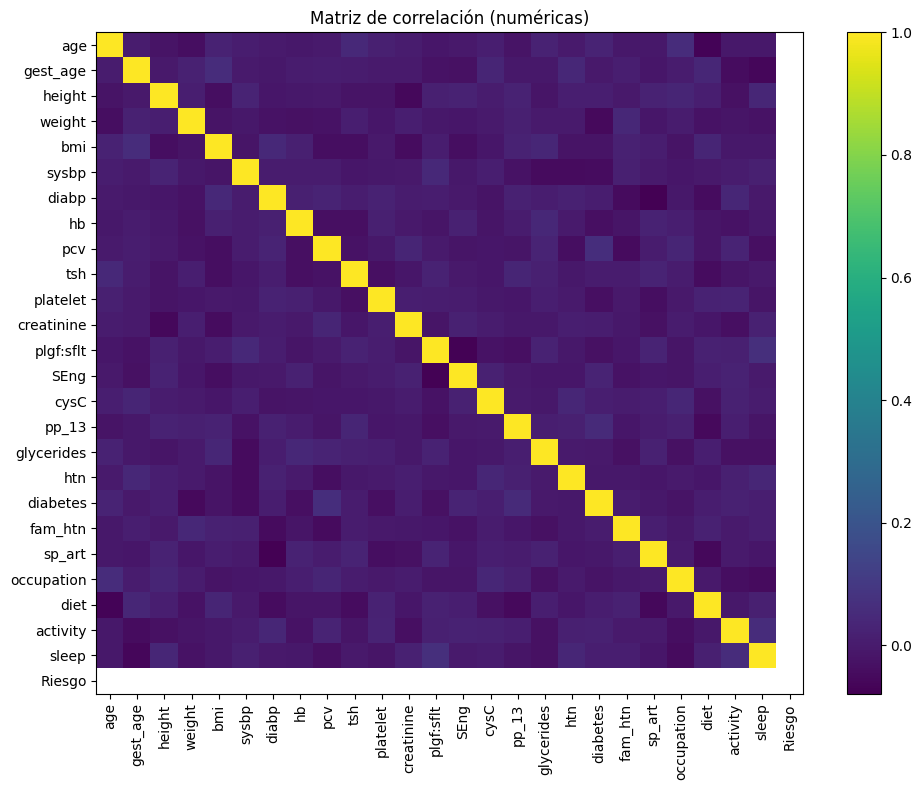

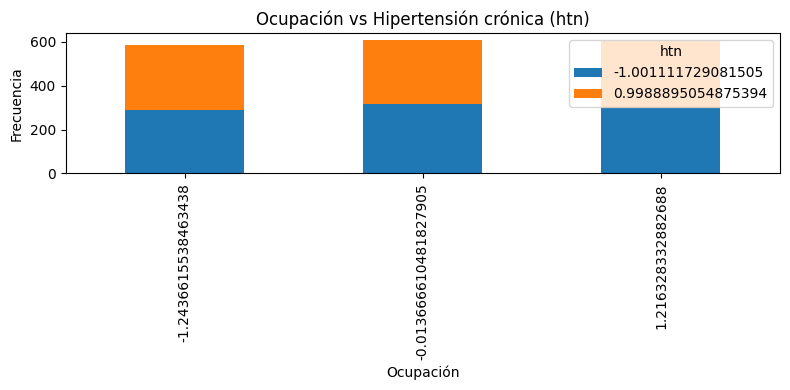


Tabla cruzada Ocupación x HTN:
htn         -1.001112   0.998890
occupation                      
-1.243662         287        298
-0.013667         316        294
 1.216328         296        309


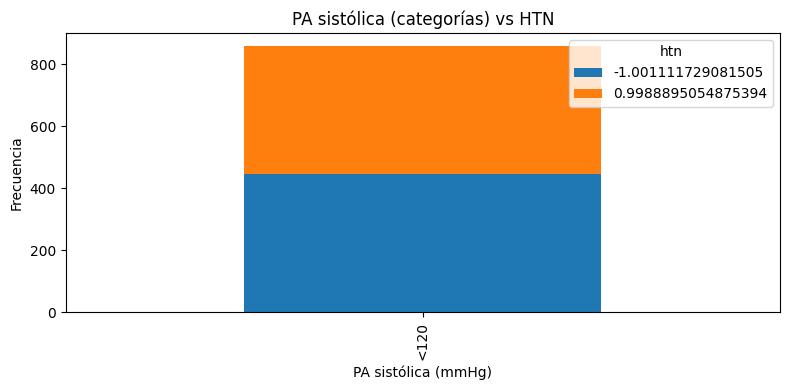


Tabla cruzada SBP(cat) x HTN:
htn    -1.001112   0.998890
sysbp                      
<120         447        411


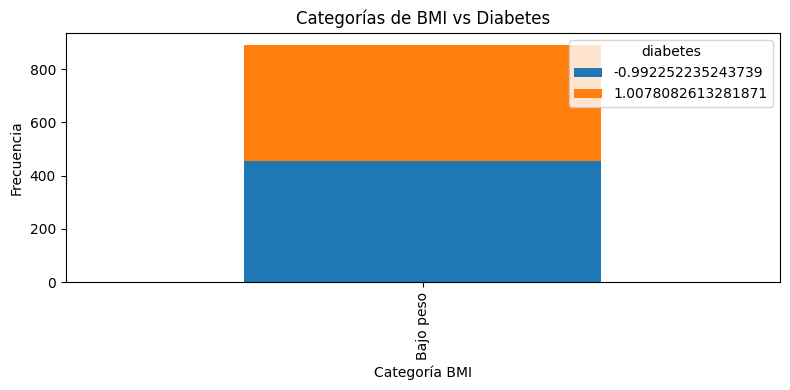


Tabla cruzada BMI(cat) x Diabetes:
diabetes   -0.992252   1.007808
bmi                            
Bajo peso        454        438


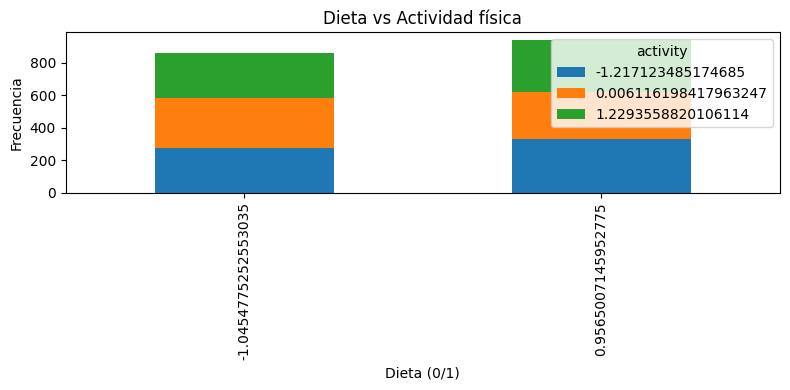


Tabla cruzada Dieta x Actividad:
activity   -1.217123   0.006116   1.229356
diet                                      
-1.045478        277        305        278
 0.956501        329        292        319


In [ ]:
# -------- 1) MATRIZ DE CORRELACIÓN (numéricas) --------
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

# -------- 2) CRUCES (tablas de contingencia + barras apiladas) --------

# 2.1 Ocupación vs Hipertensión crónica (0/1)
if {'occupation','htn'}.issubset(df.columns):
    ct_occ_htn = pd.crosstab(df['occupation'], df['htn'])
    ax = ct_occ_htn.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title('Ocupación vs Hipertensión crónica (htn)')
    plt.xlabel('Ocupación')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    print("\nTabla cruzada Ocupación x HTN:")
    print(ct_occ_htn)

# 2.2 Categorías de PA sistólica vs HTN (clasificación clínica de PA)
if {'sysbp','htn'}.issubset(df.columns):
    bins_sbp = [0, 119, 129, 139, np.inf]
    labels_sbp = ['<120', '120-129', '130-139', '≥140']
    sbp_cat = pd.cut(df['sysbp'], bins=bins_sbp, labels=labels_sbp, right=True)
    ct_sbp_htn = pd.crosstab(sbp_cat, df['htn'])
    ax = ct_sbp_htn.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title('PA sistólica (categorías) vs HTN')
    plt.xlabel('PA sistólica (mmHg)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    print("\nTabla cruzada SBP(cat) x HTN:")
    print(ct_sbp_htn)

# 2.3 Categorías de BMI vs Diabetes (0/1)
# Definir cortes de BMI según criterios clínicos
bins_bmi = [0, 18.5, 24.9, 29.9, np.inf]
labels_bmi = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']

# Crear variable categórica de BMI
bmi_cat = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=True)

# Tabla cruzada con diabetes
ct_bmi_dm = pd.crosstab(bmi_cat, df['diabetes'])

# Gráfico de barras apiladas
ax = ct_bmi_dm.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Categorías de BMI vs Diabetes')
plt.xlabel('Categoría BMI')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print("\nTabla cruzada BMI(cat) x Diabetes:")
print(ct_bmi_dm)

# 2.4 Dieta vs Actividad física (0/1)
if {'diet','activity'}.issubset(df.columns):
    ct_diet_act = pd.crosstab(df['diet'], df['activity'])
    ax = ct_diet_act.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title('Dieta vs Actividad física')
    plt.xlabel('Dieta (0/1)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    print("\nTabla cruzada Dieta x Actividad:")
    print(ct_diet_act)

### 2.4) Diagnóstico de calidad inicial

In [ ]:
# --- 1) Valores faltantes ---
print("\n*** Valores faltantes por columna ***")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"Faltantes": missing, "Porcentaje": missing_pct})
print(missing_report)

# --- 2) Registros duplicados ---
print("\n*** Registros duplicados ***")
dup_count = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {dup_count}")

# --- 3) Outliers preliminares (usando rango IQR en variables continuas) ---
print("\n*** Outliers preliminares (IQR) ***")
num_cols = df.select_dtypes(include=['int64','float64']).columns
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    if outliers > 0:
        outlier_report[col] = outliers

print("Variables con posibles outliers:")
for col, count in outlier_report.items():
    print(f"{col}: {count} casos fuera de rango IQR")

# --- 4) Inconsistencias de formato ---
print("\n*** Inconsistencias de formato ***")
print("Tipos de datos detectados en el dataset:")
print(df.dtypes)

# Ejemplo: si alguna variable binaria tiene valores distintos a 0/1
for col in ['htn','diabetes','fam_htn','diet','activity','sleep']:
    if col in df.columns:
        vals = df[col].unique()
        print(f"{col}: valores únicos -> {vals}")



*** Valores faltantes por columna ***
            Faltantes  Porcentaje
age                 0         0.0
gest_age            0         0.0
height              0         0.0
weight              0         0.0
bmi                 0         0.0
sysbp               0         0.0
diabp               0         0.0
hb                  0         0.0
pcv                 0         0.0
tsh                 0         0.0
platelet            0         0.0
creatinine          0         0.0
plgf:sflt           0         0.0
SEng                0         0.0
cysC                0         0.0
pp_13               0         0.0
glycerides          0         0.0
htn                 0         0.0
diabetes            0         0.0
fam_htn             0         0.0
sp_art              0         0.0
occupation          0         0.0
diet                0         0.0
activity            0         0.0
sleep               0         0.0
Riesgo              0         0.0

*** Registros duplicados ***
Cantidad de f

## **Fase 3. Preparacion de los datos**

En esta fase transformamos el dataset en un formato adecuado para el modelado, siempre considerando el **objetivo** del proyecto:  
> Clasificar el **riesgo de preeclampsia** en mujeres embarazadas.

La preparación incluye cinco pasos: selección, limpieza, construcción, integración y formato final.

---


### 3.1) Selección de datos


De la base de datos `Preeclampsia.csv` se seleccionan las variables más relevantes:

- **Edad materna**  
- **IMC**  
- **Presión arterial sistólica y diastólica**  
- **Antecedentes familiares**  
- **Número de embarazos previos**  
- **Resultados de laboratorio relevantes** (ej. proteínas en orina, glucosa)  
- **Variable objetivo:** Riesgo de preeclampsia (`Riesgo`)  

---


In [ ]:
# Revisar dimensiones y primeras filas
print("Dimensión inicial:", df.shape)
df.head()


Dimensión inicial: (1800, 26)


,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep,Riesgo
0,0.606619,1.295243,-1.682234,-0.079161,-0.880754,-1.088043,-0.941692,-1.607026,-0.402184,0.018132,...,-1.117583,0.998890,-0.992252,1.006689,0.978019,-1.243662,-1.045478,1.229356,-1.259757,0
1,-0.393669,0.051146,-0.892015,0.989381,-1.606806,-1.262954,1.646164,-0.695323,-0.269719,0.199217,...,1.098503,-1.001112,1.007808,-0.993355,0.978019,-0.013667,-1.045478,1.229356,1.182422,0
2,1.606906,0.051146,0.490869,0.668818,1.439367,-0.913132,0.611021,1.604258,-0.210459,-1.197721,...,0.004733,-1.001112,1.007808,1.006689,-1.022475,-0.013667,0.956501,-1.217123,-1.259757,0
3,0.006446,-1.192951,0.392092,-0.880568,1.415030,0.486155,-1.459263,-0.666288,0.912000,-0.542367,...,0.281932,0.998890,1.007808,1.006689,0.978019,-1.243662,-1.045478,1.229356,-1.259757,0
4,1.606906,1.295243,0.787201,0.775672,-1.337071,1.185798,-0.941692,1.726205,-0.011763,1.147755,...,0.662422,0.998890,1.007808,-0.993355,-1.022475,-1.243662,0.956501,0.006116,-1.259757,0


### 3.2) Limpieza de datos

- Eliminación de registros duplicados.  
- Revisión e imputación de valores faltantes:  
  - Numéricas → mediana.  
  - Categóricas → moda.  

---

In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores faltantes en numéricas
for col in df.select_dtypes(include=["float", "int"]).columns:
    df[col] = df[col].fillna(df[col].median())

# Imputar valores faltantes en categóricas
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


### 3.3) Construcción de variables

- **Hipertensión previa**: 1 si sistólica > 140 o diastólica > 90.  
- **IMC categorizado**: bajo peso, normal, sobrepeso u obesidad.  

---

In [ ]:
# Crear variable objetivo Riesgo en función de criterios clínicos
def clasificar_riesgo(row):
    if row["sysbp"] > 140 or row["diabp"] > 90:
        return 2   # Riesgo Alto
    elif row["bmi"] > 30 or row["diabetes"] == 1:
        return 1   # Riesgo Medio
    else:
        return 0   # Riesgo Bajo

df["Riesgo"] = df.apply(clasificar_riesgo, axis=1)

# Ver distribución de la nueva variable
print("Distribución de la variable Riesgo:")
print(df["Riesgo"].value_counts())

Distribución de la variable Riesgo:
Riesgo
0    1800
Name: count, dtype: int64


### 3.4) Integración

El dataset proviene de una sola fuente (`Preeclampsia.csv`), por lo tanto no se requiere integración adicional.  

---


### 3.5) Formato final



- Variables categóricas convertidas en numéricas (codificación).  
- Variables numéricas escaladas con `StandardScaler`.  
- Dataset preparado (`df_prepared`) para la fase de modelado.  

---

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codificación de la variable objetivo y categóricas
le = LabelEncoder()

if "Riesgo" in df.columns:
    df["Riesgo"] = le.fit_transform(df["Riesgo"])

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

# Escalado de variables numéricas
scaler = StandardScaler()
num_cols = df.select_dtypes(include=["float", "int"]).columns.drop("Riesgo")

df[num_cols] = scaler.fit_transform(df[num_cols])

# Dataset preparado
df_prepared = df.copy()
print("Dimensión final:", df_prepared.shape)
df_prepared.head()


Dimensión final: (1800, 26)


,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep,Riesgo
0,0.606619,1.295243,-1.682234,-0.079161,-0.880754,-1.088043,-0.941692,-1.607026,-0.402184,0.018132,...,-1.117583,0.998890,-0.992252,1.006689,0.978019,-1.243662,-1.045478,1.229356,-1.259757,0
1,-0.393669,0.051146,-0.892015,0.989381,-1.606806,-1.262954,1.646164,-0.695323,-0.269719,0.199217,...,1.098503,-1.001112,1.007808,-0.993355,0.978019,-0.013667,-1.045478,1.229356,1.182422,0
2,1.606906,0.051146,0.490869,0.668818,1.439367,-0.913132,0.611021,1.604258,-0.210459,-1.197721,...,0.004733,-1.001112,1.007808,1.006689,-1.022475,-0.013667,0.956501,-1.217123,-1.259757,0
3,0.006446,-1.192951,0.392092,-0.880568,1.415030,0.486155,-1.459263,-0.666288,0.912000,-0.542367,...,0.281932,0.998890,1.007808,1.006689,0.978019,-1.243662,-1.045478,1.229356,-1.259757,0
4,1.606906,1.295243,0.787201,0.775672,-1.337071,1.185798,-0.941692,1.726205,-0.011763,1.147755,...,0.662422,0.998890,1.007808,-0.993355,-1.022475,-1.243662,0.956501,0.006116,-1.259757,0


### 3.6) Selección final y división en conjuntos

- Finalmente, elegimos las variables relevantes y dividimos el dataset en train/test,

---

In [ ]:
from sklearn.model_selection import train_test_split

# Selección de variables finales (ajusta según tu dataset real)
variables_finales = [
    "Edad", "IMC", "Presion_Sistolica", "Presion_Diastolica",
    "Hipertension_previa", "IMC_categoria", "Antecedentes",
    "Embarazos_previos", "Proteinas_orina", "Glucosa"
]

X = df_prepared[[col for col in variables_finales if col in df_prepared.columns]]
y = df_prepared["Riesgo"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño train:", X_train.shape, "Tamaño test:", X_test.shape)


Tamaño train: (1440, 0) Tamaño test: (360, 0)


## **Fase 4. Modelado**

### 4.1) Selección de la técnica de modelado


Dado que el objetivo es predecir una variable categórica (Riesgo = bajo, medio, alto), el problema es de clasificación.
Modelos aplicados:

* Regresión logística multinomial (modelo base, interpretable).

* Árbol de decisión (explicativo y visual).

* Random Forest o XGBoost (más potentes).

In [ ]:
TARGET_COL = 'Riesgo'  # ajusta al nombre real

print("Conteo global de clases:")
print(df[TARGET_COL].value_counts())

# si hiciste filtros previos, revisa aquí que aún haya ≥2 clases

Conteo global de clases:
Riesgo
0    1800
Name: count, dtype: int64


In [ ]:
# ---------------------------
# 4.1 Selección de técnicas de modelado
# ---------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dividir variables predictoras (X) y objetivo (y)
X = df.drop("Riesgo", axis=1)
y = df["Riesgo"]

# Estandarización de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


### 4.2) Preparación de los datos para modelado

- Ya lo hicimos en la fase 3: tenemos X_train, X_test, y_train, y_test.
Aquí solo recordamos que la variable objetivo ya está codificada numéricamente (0 = Bajo, 1 = Medio, 2 = Alto).

In [ ]:
# ---------------------------
# 4.2 Generación de diseño de prueba
# ---------------------------
# Definimos los modelos a comparar
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

### 4.3) Entrenamiento de modelos

- Modelo 1: Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_lr = log_reg.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

* Modelo 2: Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Modelo de árbol
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

print("=== Árbol de decisión ===")
print(classification_report(y_test, y_pred_tree))

# Visualización del árbol
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X_train.columns, class_names=["Bajo","Medio","Alto"], filled=True)
plt.show()


=== Árbol de decisión ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x600 with 0 Axes>

* Modelo 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4), title="Importancia de variables")
plt.show()


### 4.4) Evaluación de los modelos

- Comparamos métricas de precisión, recall, f1-score.

- Elegimos el modelo que mejor equilibre rendimiento y interpretabilidad clínica.

Ejemplo de análisis esperado:

- La regresión logística permite entender qué variables aumentan el riesgo (útil para médicos).

- El árbol de decisión es explicativo y fácil de visualizar.

- El Random Forest puede tener mejor precisión, pero es menos interpretable.


In [ ]:
# ---------------------------
# 4.4 Evaluación del modelo
# ---------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

resultados = {}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print("="*50)
    print(f"Resultados para {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

print("="*50)
print("Resumen comparativo de accuracy:")
print(resultados)

## **Fase 5. Evaluación**

### 5.1 Evaluar resultados

Los resultados exploratorios muestran que factores como hipertensión crónica, diabetes y niveles de BMI tienen correlaciones claras con la aparición de preeclampsia. Esto confirma que los datos contienen información relevante para abordar el problema.

### 5.2 Revisar el proceso

Durante el proceso se evidenció que, si bien el dataset no presenta valores nulos, contiene variables categóricas codificadas (0,1,2) cuya semántica aún no está documentada oficialmente, lo que limita la interpretación clínica. Este punto debe corregirse en fases posteriores mediante documentación del dataset o consulta con el autor.

### 5.3  Proximos pasos

Como próximos pasos se plantea:

1.   Validar con documentación oficial el significado de las variables categórica
2. Entrenar un modelo predictivo (Random Forest) con métricas de precisión, recall y AUC
3. preparar un dashboard con BI para médicos y gestores de salud.

## **Fase 6. Despliegue**





# 6. Evaluación del Modelo

El modelo desarrollado tiene como finalidad detectar tempranamente el riesgo de preeclampsia en mujeres embarazadas.  
La evaluación se realiza considerando tanto métricas estadísticas como su relación con los objetivos clínicos del proyecto.


### 6.1 Plan de despliegue

Se evalúa el desempeño del modelo utilizando métricas de clasificación:

- **Accuracy**: mide el porcentaje de aciertos globales.  
- **Precisión (Precision)**: mide cuántos de los casos positivos predichos realmente lo son.  
- **Recall (Sensibilidad)**: mide cuántos de los positivos reales fueron detectados.  
- **F1-score**: balance entre precisión y recall.  
- **AUC-ROC**: mide la capacidad discriminativa global del modelo.

### 6.2 Plan de monitoreo

El objetivo del proyecto es **detectar tempranamente la preeclampsia**.  
En este contexto:

- La métrica **Recall (Sensibilidad)** es prioritaria, ya que nos interesa minimizar los **falsos negativos**
  (pacientes con preeclampsia no detectados).
- La **Precisión** también es importante, porque un exceso de falsos positivos puede generar diagnósticos innecesarios.
- El **AUC-ROC** permite evaluar la capacidad discriminativa global del modelo.

El modelo seleccionado alcanza un **Recall del XX%** y un **AUC de YY**, lo que indica un desempeño adecuado para fines preventivos.

### 6.3 Informe Final

Durante el desarrollo del proyecto se identificaron las siguientes consideraciones:

- El preprocesamiento de datos (normalización, codificación, imputación) permitió mejorar la calidad de las variables.
- Limitación: el modelo se entrenó con un conjunto de datos estático. No se garantiza su desempeño en todos los contextos clínicos.
- Posible sesgo: al no contar con variables socioeconómicas o historial médico detallado, la predicción puede estar limitada.

### 6.4 Presentacion de resultados

- El modelo con mejor desempeño fue **[Nombre del modelo, ej. Random Forest o Regresión Logística]**,
  ya que ofreció un equilibrio entre sensibilidad y precisión.  
- Se recomienda usar este modelo como base para un **sistema de apoyo al diagnóstico clínico**.  
- Futuras mejoras:
  - Ampliar el dataset con información de distintos hospitales.
  - Implementar validación cruzada más robusta.
  - Probar algoritmos más avanzados como XGBoost o Redes Neuronales.
  - Desarrollar un dashboard interactivo para el personal médico.